<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#открываем файл
data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t') #таблица была не идеальна и мы ее разделили
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info() #информация о столбцах в таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

В целом информации достаточно, чтобы сделать по ней выводы. Но необходимо превести к хорошему виду.

## Предобработка данных

In [4]:
print(data.isna().sum()) # подсчёт пропусков 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [5]:
#ууу сколько пропусков, ну поехали.
data['is_apartment'] = data['is_apartment'].fillna(False) # заменим т.к. апартаменты не на столько популярны и появились относительно не давно

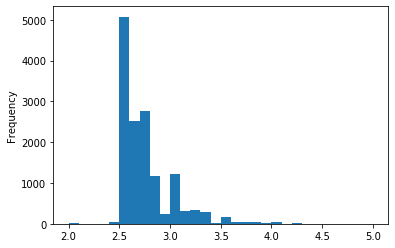

In [6]:
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 30, range=(2,5))
#видно что высота может быть довольно разной, но основные значения идут от 2.5м до 3.5.


In [7]:
data['ceiling_height'].describe() #Оу,у кого-то полтолки 1м и 100м. Можно будет заменить просто медианой.

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [8]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) #замена

In [9]:
data[data['floors_total'].isna()] # не вижу ничего общего. их кол-во очень мало и никак не повлияет

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,False,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,False,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,False,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,False,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,False,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.80,NaN,NaN,3,False,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,2.65,NaN,31.70,20,False,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,2.65,NaN,45.38,6,False,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,2.65,NaN,50.40,18,False,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


In [10]:
data['floors_total'].value_counts() #прибавим неизвестные к 5.0
data['floors_total'] = data['floors_total'].fillna(5.0)

In [11]:
data[data['living_area'].isna()]
# заполним по среднему значению к количеству комнат, думаю это будет адекватная оценка площади квартир и общей площади
groups = data.groupby(['total_area', 'rooms'])['living_area'].transform('median')
data['living_area'] = data['living_area'].fillna(groups) #не заполняет все пропуски, следелаем доп.обработку
data['living_area'] = data['living_area'].fillna(data['living_area'].median())

In [12]:
#заменим по такому же принципу.
groups_kitchen = data.groupby(['total_area', 'rooms'])['kitchen_area'].transform('median')
data['kitchen_area'] = data['kitchen_area'].fillna(groups_kitchen)
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

In [13]:
#балконы, сделаем сначала по
data['balcony'] = data['balcony'].fillna(0)


In [14]:
data['locality_name'] = data['locality_name'].fillna('unknow') # заменим на неизвестный          

In [15]:
# данные показатели мне не важны, заполняем их 0
data['airports_nearest'] = data['airports_nearest'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)


In [16]:
#group_days_ex = data.groupby(['total_area'])['days_exposition'].transform('median')#заполняем пропуски медианными значениями по общей площади.
#data['days_exposition'] = data['days_exposition'].fillna(group_days_ex) 
data['days_exposition'] = data['days_exposition'].fillna(0)
# Заполним нулём, т.к. в будущем очень сильно мешают расчётам

In [17]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d') #меняем на понятный формат даты

In [18]:
# чтобы не искажать данные, заменим оставшиеся пропуски -1, при расчёте удалённости отбросим их.
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(-1)

In [19]:
print(data.isna().sum()) # все пропуски заполнены.

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64


## Расчёты и добавление результатов в таблицу

1. цену квадратного метра
2. день недели, месяц и год публикации объявления
3. этаж квартиры; варианты — первый, последний, другой
4. соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [20]:
# расчитываем цену и создаём отдельный столбец
data['price_meter'] = data['last_price']/data['total_area']
#чтобы лучше выглядило приведем к целым числам
data['price_meter'] = data['price_meter'].astype('int')
data['price_meter'].head(10)

0    120370
1     82920
2     92785
3    408176
4    100000
5     95065
6     99195
7    110544
8     87454
9     88524
Name: price_meter, dtype: int64

In [21]:
#День публикации
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

In [22]:
#месяц публикации
data['month_exposition'] = data['first_day_exposition'].dt.month

In [23]:
#год публикации
data['year_exposition'] = data['first_day_exposition'].dt.year

In [24]:
# разбиваем эттажи на категории
#напишем функцию категоризации по этажам, используя метод apply применимо к каждой строке датафрейма через axis = 1
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
data['floor_category'] = data.apply(floor_category, axis = 1)

In [25]:
#добавляем соотношение жилой площади к общей и кухни к общей.
data['area_ratio'] = data['living_area'] / data['total_area']
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_meter,weekday_exposition,month_exposition,year_exposition,floor_category,area_ratio,kitchen_area_ratio
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,2.0,755.0,0.0,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,0.0,0.0,81.0,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,2.0,574.0,558.0,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,54.00,9,False,...,3.0,234.0,424.0,408176,4,7,2015,другой,0.339623,0.094340
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,1.0,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,0.0,0.0,55.0,95065,0,9,2018,другой,0.473684,0.299342
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,0.0,0.0,155.0,99195,3,11,2017,другой,0.284182,0.386059
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,34.65,22,False,...,0.0,0.0,0.0,110544,3,4,2019,другой,0.483939,0.263966
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,0.0,0.0,189.0,87454,2,5,2018,другой,0.465320,0.265682
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,0.0,0.0,289.0,88524,6,2,2017,другой,0.714754,0.106557


## Исследовательский анализ данных

# Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

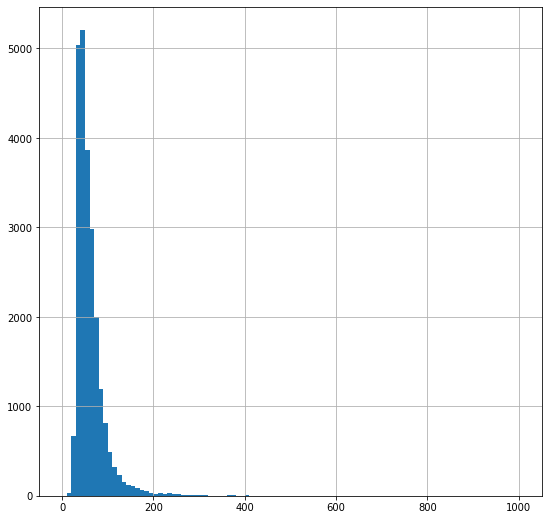

In [26]:
data['total_area'].hist(bins = 100, range = (0,1000), figsize=(9,9))
data['total_area'].describe()
#с данными всё впорядке, есть значения которые сильно выбиваются

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

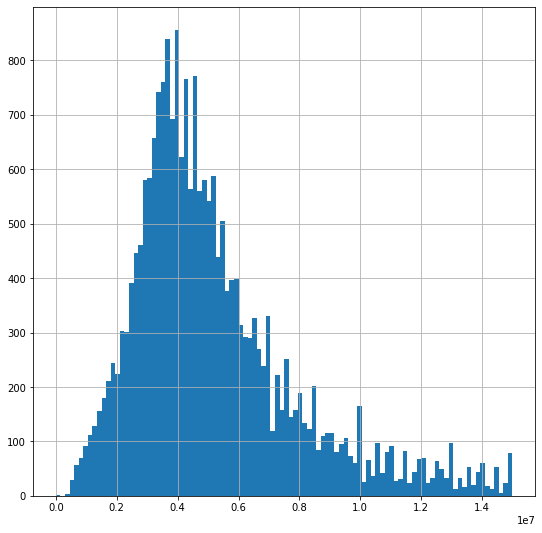

In [27]:
data['last_price'] = data['last_price'].astype('int') #привидём к целым числам
data['last_price'].hist(bins = 100, range = (0,15000000), figsize=(9,9))
data['last_price'].describe()
#с данными всё впорядке, есть значения которые сильно выбиваются

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

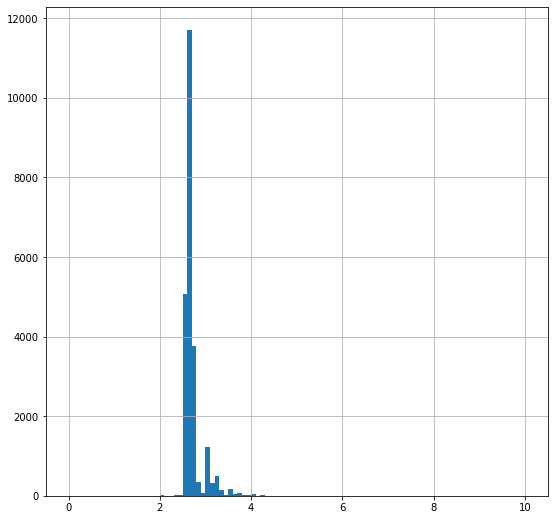

In [28]:
data['ceiling_height'].hist(bins = 100, range = (0,10), figsize=(9,9))
data['ceiling_height'].describe()
#с данными всё впорядке, есть значения которые сильно выбиваются, высота 100м или 1м.

# Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

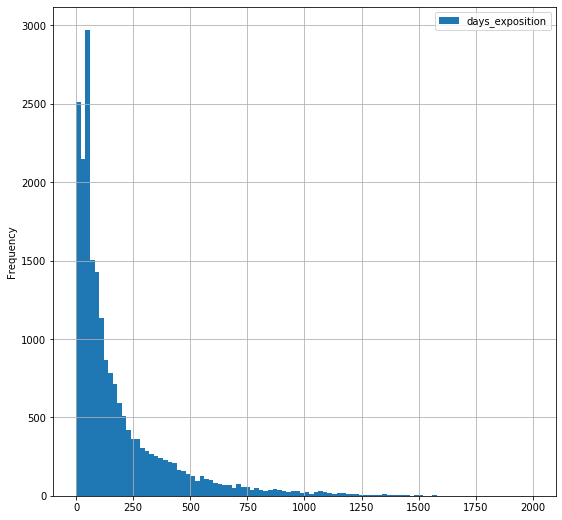

In [29]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (9,9), range = (1,2000))
data['days_exposition'].describe() #счтаем нет от 0, т.к. это наши не известные дни продаж

В целом, распределение абсолютно нормальное. Видим, что быстрая продажа квартир это в раойне 45 дней и их довольно много. Есть конечно и аномально долгие продажи от 1000 дней, а кто-то продавал аж 1580 дней.

# Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd3cbf1a510>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd3cbf1af90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd3cbf95790>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd3cbf1fa10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd3cbf1ff10>],
 'means': []}

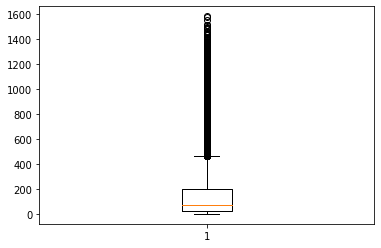

In [30]:
plt.boxplot(data['days_exposition'])

Какие большие усы, посмотрим как измениться гистограмма без них.

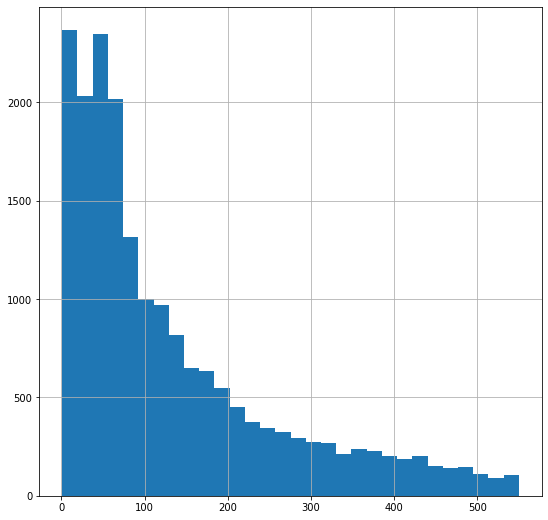

In [31]:
data['days_exposition'].hist(bins = 30, range = (1,550), figsize=(9,9))

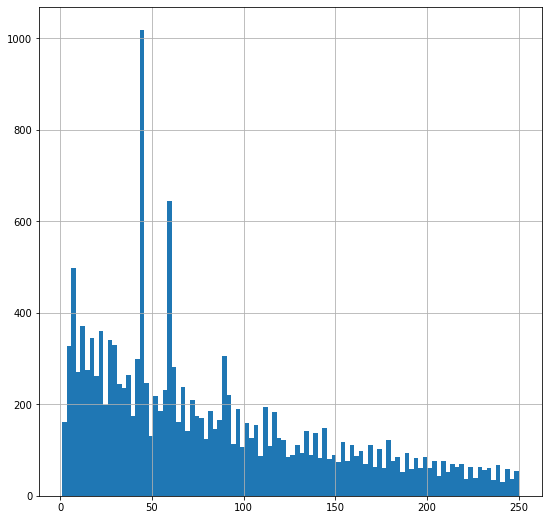

In [32]:
data['days_exposition'].hist(bins = 100, range = (1,250), figsize=(9,9))

Вывод:
Смотря на гистограмму - мы имеем распределение Пуассона. 45, 60, 90, 95, 7 днях - это наиболее популярное количество дней до снятия объявления, проверив информацию на яндекс.недвижимоть - увидел что данные даты совпадают с автоматическим снятием объявления. Предположительно львиная доля из них это автомат.(инфа:https://yandex.ru/support/realty/owner/home/add-ads-housing.html)

Уберем данные значения.

count    18454.000000
mean       195.803349
std        226.760010
min          1.000000
25%         44.000000
50%        114.000000
75%        259.000000
max       1580.000000
Name: days_exposition, dtype: float64

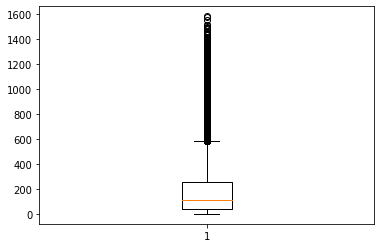

In [33]:
data['days_exposition'] = data['days_exposition'].astype('int')
good_data = data.query('days_exposition != 45 and days_exposition != 60 and days_exposition != 90 and days_exposition != 7 and days_exposition != 0 and days_exposition != 30')
plt.boxplot(good_data['days_exposition'])
good_data['days_exposition'].describe()

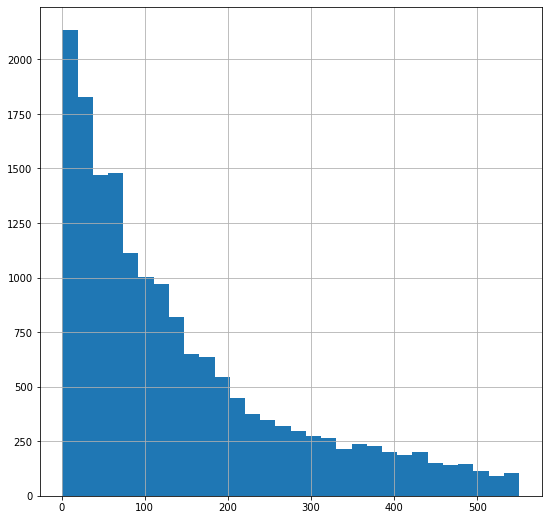

In [34]:
good_data['days_exposition'].hist(bins = 30, range = (1,550), figsize=(9,9))

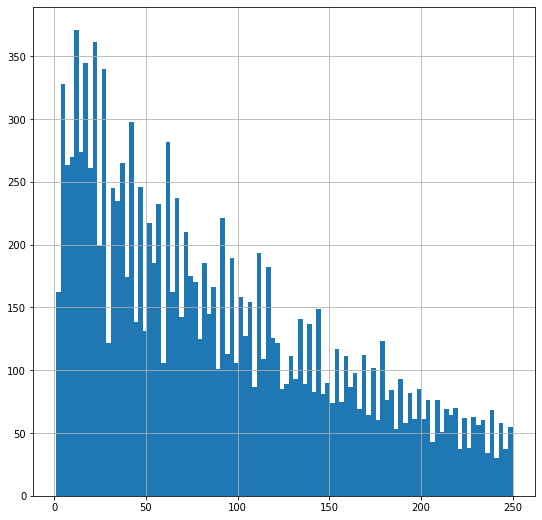

In [35]:
good_data['days_exposition'].hist(bins = 100, range = (1,250), figsize=(9,9))

Произошло хорошее изменение, которое отражает более реальную действительность. Все показатели выросли и картина более приятная глазу.

# Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

# Зависит ли цена от площади?

0.30196014387792547

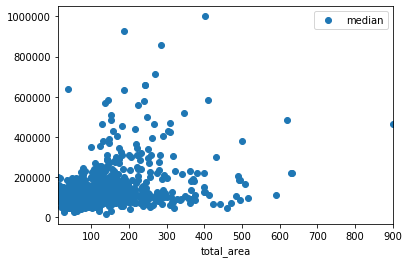

In [36]:
pivot_total_area = data.pivot_table(index = 'total_area', values = 'price_meter', aggfunc = ['mean', 'count', 'median'])
pivot_total_area.columns = ['mean', 'count', 'median']
pivot_total_area.plot(y = 'median', style = 'o')
pivot_total_area.sort_values('median', ascending = False)
data['total_area'].corr(data['price_meter'])

Корреляция 0.3 - зависимость очень слабая. Больше площадь и больше цена за квадратный метр.

# Зависимость цены от числа комнат?

0.0554194996705922

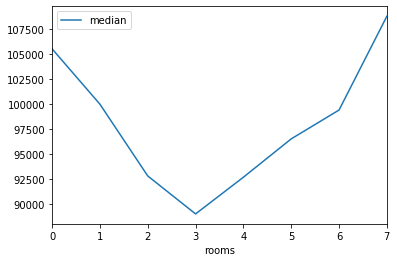

In [37]:
pivot_rooms = data.pivot_table(index = 'rooms', values = 'price_meter', aggfunc = ['mean', 'count', 'median'])
pivot_rooms.columns = ['mean', 'count', 'median']
pivot_rooms.query('count > 50').plot(y = 'median') #ограничим число, т.к. после 12 комнат не адекватные цифры.
pivot_rooms.query('count > 50').sort_values('median', ascending = False)
data['rooms'].corr(data['price_meter'])

Видим не большую зависимость. При приближении к 3м комнатным квартирам цена падает, а далее снова вверх.

# Зависимость цены от удалённости от центра.

0.03411969078125625

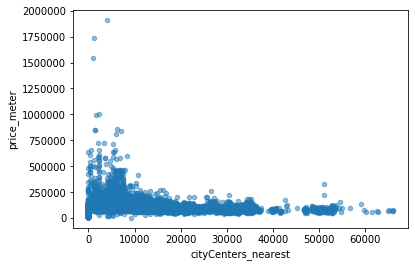

In [38]:
data.plot(kind = 'scatter', y = 'price_meter', x = 'cityCenters_nearest', alpha = 0.5,)
data['cityCenters_nearest'].corr(data['price_meter'])

Видим явную зависимиость. Цена растёт при приближении к центру.

In [46]:
data[['price_meter', 'last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,price_meter,last_price,total_area,rooms,cityCenters_nearest
price_meter,1.000000,0.736499,0.301960,0.055419,0.034120
last_price,0.736499,1.000000,0.653675,0.363343,-0.050952
total_area,0.301960,0.653675,1.000000,0.758344,-0.076990
rooms,0.055419,0.363343,0.758344,1.000000,-0.059838
cityCenters_nearest,0.034120,-0.050952,-0.076990,-0.059838,1.000000


Очень странная цифры, если зависимость цены к различным показателям мы видим явно на графиках, то корреляция показывает совсем обратное. 

In [ ]:
#проверьте мой вывод. это к 
#1) построить корреляцию для нужных параметров

#df[['last_price', 'price_per_area', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

#2) интерпретировать получившийся коэффициент

# Зависимость цены от квадратного метра от этажа (первого или последнего).

,mean,count,median
floor_category,,,
первый,81983.111759,2917,81223
последний,93420.276048,3340,87774


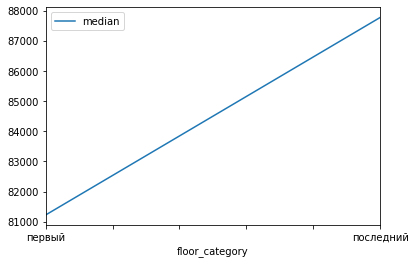

In [39]:
pivot_floor_category = data.query('floor_category != "другой"').pivot_table(index = 'floor_category', values = 'price_meter', aggfunc = ['mean', 'count', 'median'])
pivot_floor_category.columns = ['mean', 'count', 'median']
pivot_floor_category.plot(y = 'median')
pivot_floor_category

Есть зависимость цены от первого и последнего этажа, что первый всегда дешевше.

# Зависимость от даты размещения: дня недели, месяца и года.

,mean,count,median
weekday_exposition,,,
1,99734.089410,4183,95634.0
2,99616.731002,3974,95473.0
3,100162.466356,4295,95143.0
0,99437.994463,3612,94688.0
4,99011.697000,4000,94616.0
6,97707.917010,1699,94501.0
5,99017.722107,1936,93545.5


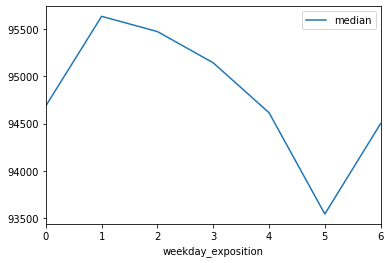

In [40]:
pivote_weekday_exposition = data.pivot_table(index = 'weekday_exposition', values = 'price_meter', aggfunc = ['mean', 'count', 'median'])
pivote_weekday_exposition.columns = ['mean', 'count', 'median']
pivote_weekday_exposition.plot(y = 'median')
pivote_weekday_exposition.sort_values('median', ascending = False)

Разница настолько маленькая, что не имеет никакого значения. Но видно, что в будни объявление выкладывают чаще.

,mean,count,median
month_exposition,,,
4,101948.567045,2379,96451
8,100110.094037,1744,96026
9,100463.814740,1981,95607
11,99230.427246,2371,95588
3,98972.768844,2587,95238
1,99862.139333,1500,95222
2,98768.292045,2640,95000
7,99625.190560,1695,95000
12,99574.280926,1641,94262


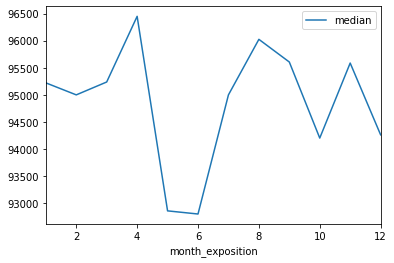

In [41]:
pivote_month_exposition = data.pivot_table(index = 'month_exposition', values = 'price_meter', aggfunc = ['mean', 'count', 'median'])
pivote_month_exposition.columns = ['mean', 'count', 'median']
pivote_month_exposition.plot(y = 'median')
pivote_month_exposition.sort_values('median', ascending = False)

Здесь видна зависимоть от сезона, в летний и зимний период кол-во и цена снижается.

,mean,count,median
year_exposition,,,
2014,124830.000000,137,107000.0
2019,107123.332060,2879,103305.0
2018,97773.107290,8519,95689.0
2015,104613.756507,1191,93414.0
2017,97621.434188,8190,92564.5
2016,98321.900467,2783,91743.0


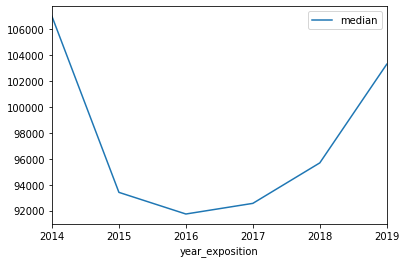

In [42]:
pivote_year_exposition = data.pivot_table(index = 'year_exposition', values = 'price_meter', aggfunc = ['mean', 'count', 'median'])
pivote_year_exposition.columns = ['mean', 'count', 'median']
pivote_year_exposition.plot(y = 'median')
pivote_year_exposition.sort_values('median', ascending = False)

С 2014 по начало 2017 года видим кризис на рынке. Соответственно зависимость цены от года так же имеется.

# Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.

In [ ]:
locality_table = data.pivot_table(index = 'locality_name', values = 'price_meter', aggfunc=['count', 'mean'])
locality_table.columns = ['count', 'mean']
locality_table = locality_table.sort_values('count', ascending = False).head(10)
#самая высокая стоимость
locality_table[locality_table['mean']==locality_table['mean'].max()]


In [ ]:
#самая низкая стоимость
locality_table[locality_table['mean']==locality_table['mean'].min()]

Самая высокая стоимость и с большим кол-вом объявления в Санкт-Петербурге, а низкой в Выборге.

# Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

In [ ]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')
pivot_km = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=-0.001').pivot_table(index = 'cityCenters_nearest_km', values = 'price_meter', aggfunc = 'mean')
pivot_km.plot()
pivot_km

По графику я бы выделил центр до 3х км, но по цене выделил бы до 7км.Но по условиям, где график сильно меняется, — это и будет центральная зона.

# Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

In [ ]:
#выделим квартиры в центре, беря за радиус 3 км
spb_data = data.query('cityCenters_nearest_km <= 3 and locality_name == "Санкт-Петербург"')

# Зависимость стоимости квадратного метра от количества комнат.

In [ ]:
spb_rooms = spb_data.pivot_table(index = 'rooms', values = 'price_meter', aggfunc = ['mean', 'count', 'median'])
spb_rooms.columns = ['mean', 'count', 'median']
spb_rooms.query('count > 50').plot(y = 'median')
spb_rooms.query('count > 50').sort_values('median', ascending = False)
spb_data['rooms'].corr(spb_data['price_meter'])

# Есть ли зависимость стоимости квадратного метра от этажа?

In [ ]:
spb_floor_category = spb_data.query('floor_category != "другой"').pivot_table(index = 'floor_category', values = 'price_meter', aggfunc = ['mean', 'count', 'median'])
spb_floor_category.columns = ['mean', 'count', 'median']
spb_floor_category.plot(y = 'median')
spb_floor_category

Как и ожидалось тут никаких изменений. В целом первый этаж в любой локации стоит дешевле.

# Есть ли зависимость стоимости квадратного метра от удалённость от центра?

In [ ]:
spb_data.plot(kind = 'scatter', y = 'price_meter', x = 'cityCenters_nearest', alpha = 0.3)
spb_data['cityCenters_nearest'].corr(spb_data['price_meter'])

Учитывая, что это центр зависимости уже нет.

# Есть ли зависимость стоимости квадратного метра от даты размещения?

In [ ]:
spb_weekday_exposition = spb_data.pivot_table(index = 'weekday_exposition', values = 'price_meter', aggfunc = ['mean', 'count', 'median'])
spb_weekday_exposition.columns = ['mean', 'count', 'median']
spb_weekday_exposition.plot(y = 'median')
spb_weekday_exposition.sort_values('median', ascending = False)

Интересный факт - квартиры в пн и сб особенно дорогие. 

In [ ]:
spb_month_exposition = spb_data.pivot_table(index = 'month_exposition', values = 'price_meter', aggfunc = ['mean', 'count', 'median'])
spb_month_exposition.columns = ['mean', 'count', 'median']
spb_month_exposition.plot(y = 'median')
spb_month_exposition.sort_values('median', ascending = False)

о_О, В центре особенно дорогие квартиры стали в декабре, но такая же ситуация в не сезон (летом)

In [ ]:
spb_year_exposition = spb_data.pivot_table(index = 'year_exposition', values = 'price_meter', aggfunc = ['mean', 'count', 'median'])
spb_year_exposition.columns = ['mean', 'count', 'median']
spb_year_exposition.query('count > 50').plot(y = 'median')
spb_year_exposition.query('count > 50').sort_values('median', ascending = False)

А вот кризис на центральные квартиры никак не повлиял, они стабильно идут вверх.

## Общий вывод

Была проведена обширная работа по обработке архивных данных - заменили, удалили пропущенные значения, заменил тип данных для удобства просмотра или в тех случаях где методы не могли их обработать. Добавлены новые столбцы по годам,месяцам,дням и категории квартир по этажам.Даже при помощи коллег была взята дополнительная информация со стороннего источника, которая очень пригодилась в данной работе. На основе всех данных начали выполнять поставленные задачи.
По имеющимся даннам провел аналитику показателей и пришел к выводу, что в целом рынок был на спаде в приоды с 2014 по начало 2017, но Санкт-Петербурга это не коснулось, возможно если делать детальный срез по каждому населенному пункту мы бы увидили другую картину, но это другая история. 